# Computation of optocoupler circuit

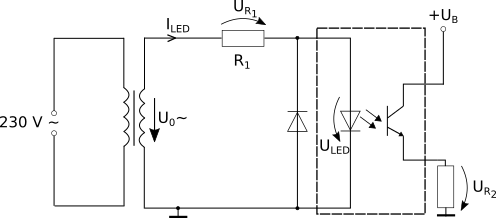

In [2]:
from IPython.display import Image
Image(filename='optocoupler.png') 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:

f = 50 # Hz
fs = 44100 # Hz
duration = 0.06 # Duration of plots in seconds
t = np.arange(0, duration, 1 / fs)

## Computation of series resistor

$$R_1 = \frac{U_0 - U_{LED}}{I_{LED}}$$

In [5]:
U0 = 17.1 * np.sin(2 * np.pi * f * t) # mains voltage in Volt (transformed from 230 V ~ to 17.1 V ~)
UB = 5 # V
# used optocoupler: SFH617G
I_LED = 0.02 # A
U_LED = 1.65 # V

In [6]:
R1 = (U0 - U_LED) / I_LED

In [7]:
R1

array([ -82.5       ,  -76.40920862,  -70.31872633, ..., -100.77113778,
        -94.68127367,  -88.59079138])

For the safety, a 1 kOhm resistor is used so as not to destroy the LED in the optocoupler.

In [8]:
R1 = 1000 # Ohm

In [9]:
I_LED = U0 / R1

## Current

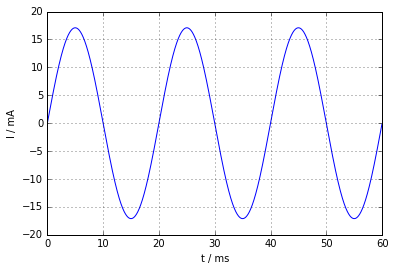

In [10]:
plt.plot(t * 1000, I_LED * 1000)
plt.ylabel("I / mA")
plt.xlabel("t / ms")
plt.grid()
plt.show()

## Voltage

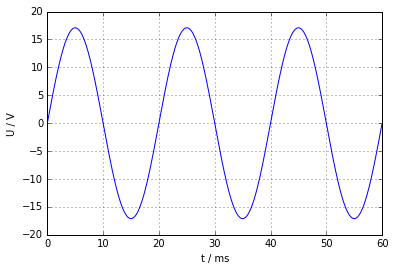

In [11]:
plt.plot(t * 1000, U0)
plt.ylabel("U / V")
plt.xlabel("t / ms")
plt.grid()
plt.show()

In [12]:
def optocoupler(signal, forward_voltage, operating_voltage):
    output = []
    for index, val in enumerate(signal):      
        if signal[index] >= forward_voltage:
            output.append(operating_voltage)
        else:
            output.append(0)
    return output
        
    

In [13]:
sig = optocoupler(U0, U_LED, UB)

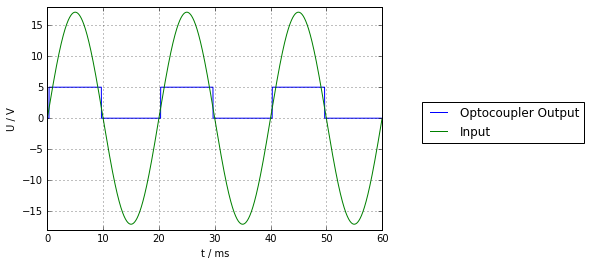

In [15]:
plt.plot(t * 1000, sig, label="Optocoupler Output")
plt.plot(t * 1000, U0, label="Input")
plt.ylabel("U / V")
plt.xlabel("t / ms")
plt.ylim([-18,18])
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.6))
plt.grid()
plt.show()